# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import itertools
from tabulate import tabulate

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass


# Question 1

**Explain how you solve the model**

In [3]:
# a. Solving the model

OurModel = HouseholdSpecializationModelClass()

arsigma=np.array([0.5,1,1.5]) 

aralpha=np.array([0.25,0.5,0.75])

result2=[]
for k,v in itertools.product(arsigma,aralpha): #for all combinations in the two arrays
    OurModel.par.sigma=k #values from the first array is used as sigma parameters in the model
    OurModel.par.alpha=v #values from second array used as alpha parameters
    temp=OurModel.solve_discrete() #naming the solution function
    result2.append(temp.g) #appending the solutions of the variable "g"(HF/HM) to the empty list "result2"

print(result2)





[0.5454545454545454, 1.0, 1.8333333333333333, 0.3076923076923077, 1.0, 3.25, 0.21428571428571427, 1.0, 4.666666666666667]


In [4]:

# b. Illustrating results

# i. Changing the solution matrix from 9x1 list to 3x3 dataframe and adding alpha and sigma as rows and columns
ser=pd.Series(result2)
ser2=ser.values.reshape((3,3))
df=pd.DataFrame(ser2, index=[arsigma], columns=[aralpha])

# ii. Style
s=pd.concat( #creating a dataframe with concatenated row and column titles, and saving it as "s"
    [pd.concat(
    [df],
    keys=['alpha'], axis=1)],
    keys=['sigma'])

cm = sns.light_palette('blue', as_cmap=True) #creating and naming a color palette
s.style.\
    set_caption('Table 0 - values of HF/HM for certain parameter value combinations').\
    background_gradient(cmap=cm, axis=None).\
    format_index(axis=0,precision=2).\
    format_index(axis=1, precision=2).\
    format(precision=4) #styling the "s" dataframe with caption, background color gradient, and formatting decimals









# Question 2

Explain your code and procedure

In [5]:

# a. Solving the model

OurModel2 = HouseholdSpecializationModelClass()

arwF=np.array([0.8,0.9,1.0,1.1,1.2]) #array of values that wF can take for the question


result3=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of HF/HM("g") to a list
    OurModel2.par.wF=k
    temp=OurModel2.solve_discrete()
    result3.append(temp.g)

result3a=np.log(result3)

print(result3a)

result4=[] 
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of wF/wM("h") to a list
    OurModel2.par.wF=k
    temp=OurModel2.solve_discrete()
    result4.append(temp.h)

result4a=np.log(result4)

print(result4a)





[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


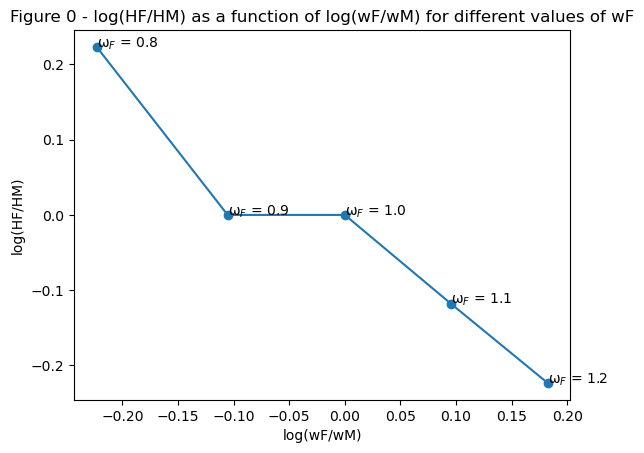

In [6]:
# b. Illustrating the results

plt.plot(result4a, result3a, marker='o')
plt.title('Figure 0 - log(HF/HM) as a function of log(wF/wM) for different values of wF')
plt.ylabel('log(HF/HM)')
plt.xlabel('log(wF/wM)')
for i, txt in enumerate(arwF): #annotating the data points with the corresponding values from the wF array
    plt.annotate("ω$_{F}$ = "+ str(txt),(result4a[i],result3a[i]))

plt.show()

# Question 3

Explain your code and procedure

In [7]:
# a. solving the model
OurModel3 = HouseholdSpecializationModelClass()

vect = np.linspace(0.8,1.2,5)

result5=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of HF/HM("g") to a list
    OurModel3.par.wF=k
    temp=OurModel3.solve()
    result5.append(temp.g)


result5a=np.log(result5)
print(result5a)



result6=[]
for k in arwF: #solving the model with the values in the wF array and appending the resulting values of wF/wM("h") to a list
    OurModel3.par.wF=k
    temp=OurModel3.solve()
    result6.append(temp.h)

result6a=np.log(result6)
print(result6a)

[ 2.23143643e-01  1.05360372e-01  1.25199162e-09 -9.53102744e-02
 -1.82321545e-01]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


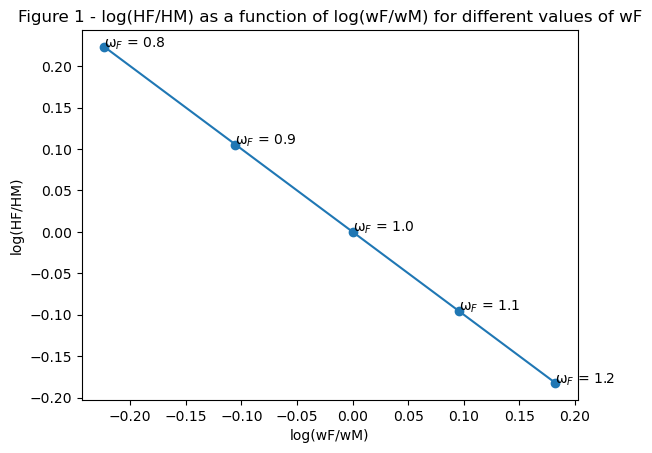

In [8]:
# b. illustrating results
plt.plot(result6a, result5a, marker='o')
plt.title('Figure 1 - log(HF/HM) as a function of log(wF/wM) for different values of wF')
plt.ylabel('log(HF/HM)')
plt.xlabel('log(wF/wM)')
for i, txt in enumerate(arwF): #annotating the data points with the corresponding values from the wF array
    plt.annotate("ω$_{F}$ = "+ str(txt),(result6a[i],result5a[i]))

plt.show()

# Question 4

In [16]:

OurModel4 = HouseholdSpecializationModelClass()

temp1=OurModel4.estimate()

print(temp1.alpha)
print(temp1.sigma)





[0.4818263551602129, 0.4700480124728796, 0.45951198087584644, 0.4499810026037265, 0.4412798237595931]
[36.504251405587794, 38.645907811702294, 37.647995537942954, 41.47863121961746, 37.64338369442323]
[0.5059176392922271, 0.49355044433621925, 0.4824876269308426, 0.4724800261112964, 0.46334382321609197]
[0.4320711965103461, 0.4197039737900531, 0.40864112156609705, 0.39863354324317707, 0.3894973900621663]
[0.3976685398227642, 0.38500685981665383, 0.3736806212825234, 0.3634347568370713, 0.3540810155891103]
[0.4114963852406476, 0.3997180867619613, 0.38918203895796794, 0.3796510062888638, 0.37094986810827013]
[0.3789537478605103, 0.36746989745358377, 0.35719724862704033, 0.34790452729671, 0.3394209143568846]
[0.3884204405650345, 0.3760532298962197, 0.3649903390213378, 0.35498281415203764, 0.3458465949296682]
[0.40324566798913725, 0.3910256728107526, 0.38009451269986383, 0.3702060835332886, 0.36117865288886847]
[0.3838121605132923, 0.37218107732388755, 0.3617767084347658, 0.35236486490734686

In [18]:
print(OurModel4.deviation(0.9999999999687899, 0.016523102196413484))


[10.44410361730489, 10.77365964264351, 10.891987131197395, 11.210915904439089, 10.6387723817582]
108.8062194731263


In [ ]:
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid,x2_grid,u_grid,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$alpha$')
ax.set_ylabel('$sigma$')
ax.set_zlabel('$errors$')

# c. invert xaxis
ax.invert_xaxis()

ADD CONCISE CONLUSION.